In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
import re


In [3]:
dos_df = pd.read_csv('/kaggle/input/car-hacking-dataset/DoS_dataset.csv')
dos_df.columns = ['Timestamp', 'CAN ID', 'DLC', 'DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']
dos_df.head()

,Timestamp,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,1.478198e+09,018f,8,fe,5b,00,00,00,3c,00,00,R
1,1.478198e+09,0260,8,19,21,22,30,08,8e,6d,3a,R
2,1.478198e+09,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,1.478198e+09,0329,8,40,bb,7f,14,11,20,00,14,R
4,1.478198e+09,0545,8,d8,00,00,8a,00,00,00,00,R


In [4]:
dos_df.nunique()

Timestamp    3665770
CAN ID            27
DLC                2
DATA0            108
DATA1             71
DATA2             76
DATA3             26
DATA4            190
DATA5            256
DATA6             75
DATA7            256
Flag               2
dtype: int64

In [5]:
df_2 = dos_df.copy()
df_2.drop('Timestamp', axis=1, inplace=True)
df_2.head()

,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,018f,8,fe,5b,00,00,00,3c,00,00,R
1,0260,8,19,21,22,30,08,8e,6d,3a,R
2,02a0,8,64,00,9a,1d,97,02,bd,00,R
3,0329,8,40,bb,7f,14,11,20,00,14,R
4,0545,8,d8,00,00,8a,00,00,00,00,R


In [6]:
missing_values = df_2.isnull().sum()
missing_values

CAN ID        0
DLC           0
DATA0         0
DATA1         0
DATA2         0
DATA3     31188
DATA4     31188
DATA5     31188
DATA6     31188
DATA7     31188
Flag      31188
dtype: int64

In [7]:
df_dlc_is_2 = df_2[df_2["DLC"] == 2].copy()
df_dlc_is_2.head(), df_dlc_is_2.shape

(    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 35    05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 134   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 226   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 319   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 411   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN,
 (31188, 11))

In [8]:
df_d2_nan = df_2[df_2["DATA2"] == 'R'].copy()
df_d2_nan.head(), df_d2_nan.shape

(    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 35    05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 134   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 226   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 319   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 411   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN,
 (31188, 11))

In [10]:
df_flag_nan = df_2[(df_2["Flag"] != "T") & (df_2["Flag"] != "R")]
df_flag_nan.head(10), df_flag_nan.shape

(    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 35    05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 134   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 226   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 319   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 411   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 504   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 596   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 689   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 781   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN
 874   05f0    2    01    00     R   NaN   NaN   NaN   NaN   NaN  NaN,
 (31188, 11))

In [11]:
df_3 = df_2.copy()

In [12]:
# For rows with DLC=2, move 'R' from DATA2 to Flag
mask = df_3["DLC"] == 2
df_3.loc[mask, "Flag"] = df_3.loc[mask, "DATA2"]  # Copy 'R' to Flag
df_3.loc[mask, "DATA2"] = np.nan  # Set DATA2 to NaN for DLC=2



# Verify alignment
print(df_3[df_3["DLC"] == 2].head())

    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
35    05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R
134   05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R
226   05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R
319   05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R
411   05f0    2    01    00   NaN   NaN   NaN   NaN   NaN   NaN    R


In [13]:
df_4 = df_3.copy()

In [14]:
# Fill NaN with hex 00
default_hex = '00'
data_columns = ['DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']
df_4[data_columns] = df_4[data_columns].fillna(default_hex)
print(df_4[df_4["DLC"] == 2].head()), df_4[df_4["DLC"] == 2].shape

    CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
35    05f0    2    01    00    00    00    00    00    00    00    R
134   05f0    2    01    00    00    00    00    00    00    00    R
226   05f0    2    01    00    00    00    00    00    00    00    R
319   05f0    2    01    00    00    00    00    00    00    00    R
411   05f0    2    01    00    00    00    00    00    00    00    R


(None, (31188, 11))

In [15]:
df_4.head(), df_4.shape

(  CAN ID  DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 0   018f    8    fe    5b    00    00    00    3c    00    00    R
 1   0260    8    19    21    22    30    08    8e    6d    3a    R
 2   02a0    8    64    00    9a    1d    97    02    bd    00    R
 3   0329    8    40    bb    7f    14    11    20    00    14    R
 4   0545    8    d8    00    00    8a    00    00    00    00    R,
 (3665770, 11))

In [16]:
df_4[(df_4["Flag"] != "T") & (df_4["Flag"] != "R")]


,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag


In [17]:
df_4[df_4["DATA2"] == 'R'].head()

,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag


In [18]:
# Drop unnecessary columns
df_drop_dlc = df_4.drop(["DLC"], axis=1).copy()
df_drop_dlc.head()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,018f,fe,5b,00,00,00,3c,00,00,R
1,0260,19,21,22,30,08,8e,6d,3a,R
2,02a0,64,00,9a,1d,97,02,bd,00,R
3,0329,40,bb,7f,14,11,20,00,14,R
4,0545,d8,00,00,8a,00,00,00,00,R


In [19]:
df_drop_dlc.dtypes, df_drop_dlc.shape

(CAN ID    object
 DATA0     object
 DATA1     object
 DATA2     object
 DATA3     object
 DATA4     object
 DATA5     object
 DATA6     object
 DATA7     object
 Flag      object
 dtype: object,
 (3665770, 10))

In [20]:
df_can_id_0000 = df_drop_dlc[df_drop_dlc["CAN ID"] == "0000"]
df_can_id_0000.head(), df_can_id_0000.shape

(     CAN ID DATA0 DATA1 DATA2 DATA3 DATA4 DATA5 DATA6 DATA7 Flag
 1475   0000    00    00    00    00    00    00    00    00    T
 1477   0000    00    00    00    00    00    00    00    00    T
 1479   0000    00    00    00    00    00    00    00    00    T
 1481   0000    00    00    00    00    00    00    00    00    T
 1483   0000    00    00    00    00    00    00    00    00    T,
 (587521, 10))

In [21]:
df_6 = df_drop_dlc.copy()
df_6.describe()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
count,3665770,3665770,3665770,3665770,3665770,3665770,3665770,3665770,3665770,3665770
unique,27,108,71,75,26,190,256,75,256,2
top,0000,00,00,00,00,00,00,00,00,R
freq,587521,1623283,1850549,2391587,1989884,1973752,1595567,2266679,2171246,3078249


In [22]:
data_columns = ['DATA0', 'DATA1', 'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7']

# Create regex pattern for valid hex
hex_pattern = r'^[0-9A-Fa-f]{2}$'

# Check for non-hex values
mask = df_6[data_columns].apply(lambda col: ~col.str.match(hex_pattern, na=False))

# Get rows with any invalid entries
invalid_rows = df_6[mask.any(axis=1)]

print("Rows with non-hex values in DATA columns:")
print(invalid_rows if not invalid_rows.empty else "No non-hex values found")

Rows with non-hex values in DATA columns:
No non-hex values found


In [23]:
df_7 = df_6.copy()
# Function to convert hex to decimal
def hex_to_int(hex_str: str) -> int:
    try:
        return int(str(hex_str).strip(), 16)  # Convert hex to int
    except ValueError:
        return np.nan 

# Convert all DATA columns
for col in df_7.columns[:-1]:  # Exclude 'Flag' column
    df_7[col] = df_7[col].apply(hex_to_int)

df_7.head()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,399,254,91,0,0,0,60,0,0,R
1,608,25,33,34,48,8,142,109,58,R
2,672,100,0,154,29,151,2,189,0,R
3,809,64,187,127,20,17,32,0,20,R
4,1349,216,0,0,138,0,0,0,0,R


In [24]:
df_8 = df_7.copy()

In [25]:
df_8["Flag"] = df_8["Flag"].map({"R": 0, "T": 1})
df_8.head()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,399,254,91,0,0,0,60,0,0,0
1,608,25,33,34,48,8,142,109,58,0
2,672,100,0,154,29,151,2,189,0,0
3,809,64,187,127,20,17,32,0,20,0
4,1349,216,0,0,138,0,0,0,0,0


In [26]:
df_8["Flag"].unique()

array([0, 1])

In [27]:
df_8.isna().sum()

CAN ID    0
DATA0     0
DATA1     0
DATA2     0
DATA3     0
DATA4     0
DATA5     0
DATA6     0
DATA7     0
Flag      0
dtype: int64

In [28]:
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665770 entries, 0 to 3665769
Data columns (total 10 columns):
 #   Column  Dtype
---  ------  -----
 0   CAN ID  int64
 1   DATA0   int64
 2   DATA1   int64
 3   DATA2   int64
 4   DATA3   int64
 5   DATA4   int64
 6   DATA5   int64
 7   DATA6   int64
 8   DATA7   int64
 9   Flag    int64
dtypes: int64(10)
memory usage: 279.7 MB


In [29]:
df_8.describe()

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
count,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06,3.665770e+06
mean,5.898021e+02,5.053060e+01,3.742432e+01,3.037550e+01,5.403188e+01,3.888667e+01,5.620259e+01,2.178434e+01,4.054242e+01,1.602722e-01
std,4.309473e+02,8.810461e+01,5.212957e+01,5.307059e+01,8.843757e+01,6.810672e+01,7.704030e+01,5.247999e+01,6.740078e+01,3.668584e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.040000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.080000e+02,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.800000e+02,3.600000e+01,3.900000e+01,3.500000e+01,4.800000e+01,3.500000e+01,1.270000e+02,9.000000e+00,5.700000e+01,0.000000e+00
max,1.680000e+03,2.550000e+02,1.920000e+02,2.520000e+02,2.550000e+02,2.550000e+02,2.550000e+02,2.090000e+02,2.550000e+02,1.000000e+00


In [30]:
# df_8.to_csv('/kaggle/working/cleaned_data.csv', index=False)

# print("Data saved successfully as 'cleaned_data.csv'.")

In [31]:
# Exclude the 'Flag' column before calculating correlation
correlation_matrix = df_8.corr()
correlation_matrix

,CAN ID,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
CAN ID,1.000000,0.280295,0.025332,0.285694,0.212122,0.339657,0.103898,0.152062,-0.106815,-0.597919
DATA0,0.280295,1.000000,0.265148,-0.084861,-0.118518,0.302947,0.162191,-0.083844,-0.158038,-0.250562
DATA1,0.025332,0.265148,1.000000,0.248555,0.249595,0.001412,0.275357,-0.195221,0.195102,-0.313639
DATA2,0.285694,-0.084861,0.248555,1.000000,0.149292,0.367018,-0.039111,0.308908,0.133593,-0.250051
DATA3,0.212122,-0.118518,0.249595,0.149292,1.000000,0.144452,0.615395,0.020012,0.038851,-0.266915
DATA4,0.339657,0.302947,0.001412,0.367018,0.144452,1.000000,0.351487,0.192900,0.019239,-0.249443
DATA5,0.103898,0.162191,0.275357,-0.039111,0.615395,0.351487,1.000000,0.066449,-0.032675,-0.318712
DATA6,0.152062,-0.083844,-0.195221,0.308908,0.020012,0.192900,0.066449,1.000000,-0.078964,-0.181347
DATA7,-0.106815,-0.158038,0.195102,0.133593,0.038851,0.019239,-0.032675,-0.078964,1.000000,-0.262787
Flag,-0.597919,-0.250562,-0.313639,-0.250051,-0.266915,-0.249443,-0.318712,-0.181347,-0.262787,1.000000


<Axes: >

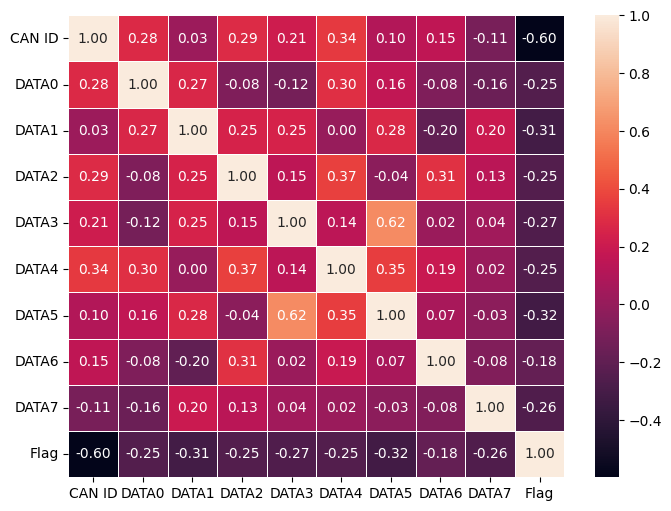

In [32]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

In [33]:
df_9 = df_8.copy()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load data
df = df_9.copy()

# 1. Preprocessing
# Convert CAN ID to categorical (important for tree models)
df['CAN ID'] = df['CAN ID'].astype('category')

# 2. Split data
X = df.drop('Flag', axis=1)
y = df['Flag']

# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

# 3. Initialize Random Forest with class weighting
rf = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',  # Handles imbalance
    max_depth=10,             # Prevent overfitting
    n_jobs=-1,                # Use all cores
    random_state=42
)

# 4. Train model
rf.fit(X_train, y_train)

# 5. Evaluate
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print(f"\nROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# 6. Feature Importance
features = X.columns
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

# Create DataFrame
fi_df = pd.DataFrame({'Feature': features, 'Importance': importances, 'Std': std})
fi_df = fi_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(fi_df['Feature'], fi_df['Importance'], yerr=fi_df['Std'])
plt.xticks(rotation=45)
plt.show()

1. **Hyperparameter Tuning**:

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned))

In [ ]:
# import pandas as pd
# import numpy as np
# import time
# import cudf
# from cuml.ensemble import RandomForestClassifier
# from cuml.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# # --------------------------
# # CPU Version (scikit-learn)
# # --------------------------
# def cpu_version(df_9):
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.model_selection import train_test_split

#     df = df_9.copy()
#     df['CAN ID'] = df['CAN ID'].astype('category').cat.codes
    
#     X = df.drop('Flag', axis=1)
#     y = df['Flag']
    
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, stratify=y, random_state=42
#     )
    
#     start_time = time.time()
#     rf = RandomForestClassifier(
#         n_estimators=100,
#         class_weight='balanced',
#         max_depth=10,
#         n_jobs=-1,
#         random_state=42
#     )
#     rf.fit(X_train, y_train)
#     cpu_train_time = time.time() - start_time
    
#     start_time = time.time()
#     y_pred = rf.predict(X_test)
#     cpu_inference_time = time.time() - start_time
    
#     return cpu_train_time, cpu_inference_time, y_test, y_pred

# # --------------------------
# # Modified GPU Version (RAPIDS cuML)
# # --------------------------
# def gpu_version(df_9):
#     # Convert to cuDF and preprocess
#     gdf = cudf.from_pandas(df_9)
#     gdf['CAN ID'] = gdf['CAN ID'].astype('category').cat.codes

#     # Cast features to float32 and target to int32
#     X = gdf.drop('Flag', axis=1).astype('float32')
#     y = gdf['Flag'].astype('int32')

#     # Split the data on GPU
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, stratify=y, random_state=42
#     )

#     # ---- Balance the training data using cuDF operations ----
#     # Compute class counts and determine minority/majority classes
#     class_counts = y_train.value_counts()
#     minority_class = class_counts.idxmin()
#     majority_class = class_counts.idxmax()

#     # Create boolean masks
#     minority_mask = (y_train == minority_class)
#     majority_mask = (y_train == majority_class)

#     # Get minority subset (all samples) and undersample majority to match minority count
#     minority_X = X_train[minority_mask]
#     minority_y = y_train[minority_mask]
#     majority_X = X_train[majority_mask].sample(n=len(minority_X), random_state=42)
#     majority_y = y_train[majority_mask].sample(n=len(minority_X), random_state=42)

#     # Concatenate the balanced subsets
#     balanced_X_train = cudf.concat([minority_X, majority_X])
#     balanced_y_train = cudf.concat([minority_y, majority_y])

#     # Shuffle the combined training data (keeping features and target aligned)
#     balanced_train = balanced_X_train.copy()
#     balanced_train['Flag'] = balanced_y_train
#     balanced_train = balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     balanced_y_train = balanced_train['Flag']
#     balanced_X_train = balanced_train.drop('Flag', axis=1)
#     # ---------------------------------------------------------

#     # Train the GPU model using parameters aligned with the CPU version
#     start_time = time.time()
#     rf = RandomForestClassifier(
#         n_estimators=100,    # matching CPU version
#         max_depth=10,        # matching CPU version
#         n_bins=32,           # experiment with binning resolution
#         random_state=42,
#         n_streams=2          # increased streams to leverage GPU parallelism
#     )
#     rf.fit(balanced_X_train, balanced_y_train)
#     gpu_train_time = time.time() - start_time

#     # Predict probabilities on the test set
#     start_time = time.time()
#     y_proba_cudf = rf.predict_proba(X_test)
#     gpu_inference_time = time.time() - start_time

#     # Convert predictions to pandas DataFrame for further processing
#     y_proba_pd = y_proba_cudf.to_pandas()
#     if y_proba_pd.shape[1] < 2:
#         raise ValueError("predict_proba did not return two columns as expected.")
#     y_proba_final = y_proba_pd.iloc[:, 1]

#     # Apply threshold to obtain final predictions
#     y_pred_final = (y_proba_final > 0.5).astype(int)

#     # Convert ground truth to pandas for metric calculation
#     y_test_pd = y_test.to_pandas()

#     return gpu_train_time, gpu_inference_time, y_test_pd, y_pred_final

# # --------------------------
# # Metric function
# # --------------------------
# def print_metrics(y_true, y_pred, label):
#     print(f"\n===== {label} Model Metrics =====")
#     print("Accuracy:", accuracy_score(y_true, y_pred))
#     print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
#     print("Classification Report:")
#     print(classification_report(y_true, y_pred))
#     print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")

# # --------------------------
# # Running the models
# # --------------------------

# print("Running CPU version...")
# cpu_train_t, cpu_inf_t, y_test_cpu, y_pred_cpu = cpu_version(df_9)

# print("\nRunning Modified GPU version...")
# gpu_train_t, gpu_inf_t, y_test_gpu, y_pred_gpu = gpu_version(df_9)

# # Print Metrics
# print_metrics(y_test_cpu, y_pred_cpu, "CPU")
# print_metrics(y_test_gpu, y_pred_gpu, "GPU")

# # Performance Comparison
# print("\nPerformance Comparison:")
# print(f"CPU Training Time: {cpu_train_t:.2f}s")
# print(f"GPU Training Time: {gpu_train_t:.2f}s (Speedup: {cpu_train_t/gpu_train_t:.1f}x)")
# print(f"\nCPU Inference Time: {cpu_inf_t:.2f}s")
# print(f"GPU Inference Time: {gpu_inf_t:.2f}s (Speedup: {cpu_inf_t/gpu_inf_t:.1f}x)")


In [45]:
# import pandas as pd
# import numpy as np
# import time
# import cudf
# from cuml.ensemble import RandomForestClassifier
# from cuml.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# # --------------------------
# # CPU Version (scikit-learn)
# # --------------------------
# def cpu_version(df_9):
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.model_selection import train_test_split

#     df = df_9.copy()
#     df['CAN ID'] = df['CAN ID'].astype('category').cat.codes
    
#     X = df.drop('Flag', axis=1)
#     y = df['Flag']
    
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, stratify=y, random_state=42
#     )
    
#     start_time = time.time()
#     rf = RandomForestClassifier(
#         n_estimators=100,
#         class_weight='balanced',
#         max_depth=10,
#         n_jobs=-1,
#         random_state=42
#     )
#     rf.fit(X_train, y_train)
#     cpu_train_time = time.time() - start_time
    
#     start_time = time.time()
#     y_pred = rf.predict(X_test)
#     cpu_inference_time = time.time() - start_time
    
#     return cpu_train_time, cpu_inference_time, y_test, y_pred

# # --------------------------
# # GPU Version (RAPIDS cuML)
# # --------------------------
# def gpu_version(df_9):
#     # Convert to cuDF DataFrame and cast features to float32
#     gdf = cudf.from_pandas(df_9)
#     gdf['CAN ID'] = gdf['CAN ID'].astype('category').cat.codes
    
#     # Cast feature columns to float32 for numerical stability and pickling
#     X = gdf.drop('Flag', axis=1).astype('float32')
#     y = gdf['Flag'].astype('int32')

#     # Split data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, stratify=y, random_state=42
#     )

#     # Improved class balancing on GPU
#     X_train_pd = X_train.to_pandas()
#     y_train_pd = y_train.to_pandas()

#     class_counts = y_train_pd.value_counts()
#     minority_class = class_counts.idxmin()
#     majority_class = class_counts.idxmax()

#     try:
#         minority_df = X_train_pd[y_train_pd == minority_class]
#         majority_df = X_train_pd[y_train_pd == majority_class].sample(n=len(minority_df), random_state=42)
#     except ValueError as e:
#         print(f"Error during undersampling: {e}")
#         return None, None, None, None

#     # Convert the balanced samples back to cuDF
#     balanced_X_train = cudf.concat([cudf.from_pandas(minority_df), cudf.from_pandas(majority_df)])
#     balanced_y_train = cudf.concat([y_train[y_train == minority_class],
#                                     y_train[y_train == majority_class].sample(n=len(minority_df), random_state=42)])

#     # Shuffle and reset index
#     balanced_X_train = balanced_X_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     balanced_y_train = balanced_y_train.iloc[balanced_X_train.index].reset_index(drop=True)

#     # Train model on GPU
#     start_time = time.time()
#     rf = RandomForestClassifier(
#         n_estimators=200,
#         max_depth=15,
#         n_bins=64,
#         random_state=42,
#         n_streams=1
#     )
#     rf.fit(balanced_X_train, balanced_y_train)
#     gpu_train_time = time.time() - start_time

#     # Predict
#     start_time = time.time()
#     y_proba_cudf = rf.predict_proba(X_test)
#     gpu_inference_time = time.time() - start_time

#     # Convert predicted probabilities to pandas before slicing
#     y_proba_pd = y_proba_cudf.to_pandas()
#     if y_proba_pd.shape[1] < 2:
#         raise ValueError("Predict_proba did not return two columns as expected.")
#     y_proba_final = y_proba_pd.iloc[:, 1]
    
#     # Using 0.5 threshold
#     y_pred_final = (y_proba_final > 0.5).astype(int)

#     # Convert ground truth to pandas
#     y_test_pd = y_test.to_pandas()

#     return gpu_train_time, gpu_inference_time, y_test_pd, y_pred_final

# # --------------------------
# # Metric function
# # --------------------------
# def print_metrics(y_true, y_pred, label):
#     print(f"\n===== {label} Model Metrics =====")
#     print("Accuracy:", accuracy_score(y_true, y_pred))
#     print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
#     print("Classification Report:")
#     print(classification_report(y_true, y_pred))
#     print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")

# # --------------------------
# # Running the models
# # --------------------------

# print("Running CPU version...")
# cpu_train_t, cpu_inf_t, y_test_cpu, y_pred_cpu = cpu_version(df_9)

# print("\nRunning GPU version...")
# gpu_train_t, gpu_inf_t, y_test_gpu, y_pred_gpu = gpu_version(df_9)

# # Print Metrics
# print_metrics(y_test_cpu, y_pred_cpu, "CPU")
# print_metrics(y_test_gpu, y_pred_gpu, "GPU")

# # Performance Comparison
# print("\nPerformance Comparison:")
# print(f"CPU Training Time: {cpu_train_t:.2f}s")
# print(f"GPU Training Time: {gpu_train_t:.2f}s (Speedup: {cpu_train_t/gpu_train_t:.1f}x)")
# print(f"\nCPU Inference Time: {cpu_inf_t:.2f}s")
# print(f"GPU Inference Time: {gpu_inf_t:.2f}s (Speedup: {cpu_inf_t/gpu_inf_t:.1f}x)")


Running CPU version...

Running GPU version...

===== CPU Model Metrics =====
Accuracy: 1.0
Confusion Matrix:
 [[615650      0]
 [     0 117504]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    615650
           1       1.00      1.00      1.00    117504

    accuracy                           1.00    733154
   macro avg       1.00      1.00      1.00    733154
weighted avg       1.00      1.00      1.00    733154

ROC AUC Score: 1.0000

===== GPU Model Metrics =====
Accuracy: 0.6249928391579396
Confusion Matrix:
 [[340712 274938]
 [     0 117504]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.55      0.71    615650
           1       0.30      1.00      0.46    117504

    accuracy                           0.62    733154
   macro avg       0.65      0.78      0.59    733154
weighted avg       0.89      0.62      0.67    733154

ROC AUC Score: 0.7

In [33]:
# import pandas as pd
# import numpy as np
# import time
# from sklearn.preprocessing import LabelEncoder
# import cudf
# from cuml.ensemble import RandomForestClassifier
# from cuml.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# # --------------------------
# # CPU Version (scikit-learn)
# # --------------------------
# def cpu_version():
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.model_selection import train_test_split

#     # Load data
#     df = df_9.copy()
#     df['CAN ID'] = df['CAN ID'].astype('category').cat.codes  # Convert to numeric
    
#     X = df.drop('Flag', axis=1)
#     y = df['Flag']
    
#     # Split data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, stratify=y, random_state=42
#     )
    
#     # Train
#     start_time = time.time()
#     rf = RandomForestClassifier(
#         n_estimators=100,
#         class_weight='balanced',
#         max_depth=10,
#         n_jobs=-1,
#         random_state=42
#     )
#     rf.fit(X_train, y_train)
#     cpu_train_time = time.time() - start_time
    
#     # Predict
#     start_time = time.time()
#     y_pred = rf.predict(X_test)
#     cpu_inference_time = time.time() - start_time
    
#     return cpu_train_time, cpu_inference_time, y_test, y_pred

# # --------------------------
# # GPU Version (RAPIDS cuML)
# # --------------------------
# # --------------------------
# # GPU Version (RAPIDS cuML)
# # --------------------------
# def gpu_version():
#     from cuml.ensemble import RandomForestClassifier
#     from cuml.model_selection import train_test_split
#     import cudf
#     from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

#     # Convert to cuDF DataFrame
#     gdf = cudf.from_pandas(df_9)
#     gdf['CAN ID'] = gdf['CAN ID'].astype('category').cat.codes
    
#     X = gdf.drop('Flag', axis=1)
#     y = gdf['Flag'].astype('int32')

#     # Split data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, stratify=y, random_state=42
#     )

#     # Convert to pandas for sampling (temporary)
#     X_train_pd = X_train.to_pandas()
#     y_train_pd = y_train.to_pandas()

#     # Undersample majority class
#     class_counts = y_train_pd.value_counts()
#     minority_class = class_counts.idxmin()
#     majority_class = class_counts.idxmax()

#     try:
#         minority_df = X_train_pd[y_train_pd == minority_class]
#         majority_df = X_train_pd[y_train_pd == majority_class].sample(n=len(minority_df), random_state=42)
#     except ValueError as e:
#         print(f"Error during undersampling: {e}")
#         return None, None, None, None

#     # Concatenate and balance the classes
#     balanced_X_train = cudf.concat([cudf.from_pandas(minority_df), 
#                                   cudf.from_pandas(majority_df)])
#     balanced_y_train = cudf.concat([y_train[y_train == minority_class],
#                                   y_train[y_train == majority_class].sample(n=len(minority_df), 
#                                                                            random_state=42)])

#     # Shuffle the data and reset the index to avoid misalignment
#     balanced_X_train = balanced_X_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     balanced_y_train = balanced_y_train.iloc[balanced_X_train.index].reset_index(drop=True)

#     # Train
#     start_time = time.time()
#     rf = RandomForestClassifier(
#         n_estimators=100,
#         max_depth=10,
#         random_state=42,
#         n_streams=1  # For reproducibility (removes warning)
#     )
#     rf.fit(balanced_X_train, balanced_y_train)
#     gpu_train_time = time.time() - start_time

#     # Predict
#     start_time = time.time()
#     y_pred = rf.predict(X_test)
#     gpu_inference_time = time.time() - start_time

#     # Convert predictions and ground truth to pandas for evaluation
#     y_test_pd = y_test.to_pandas()
#     y_pred_pd = y_pred.to_pandas()

#     return gpu_train_time, gpu_inference_time, y_test_pd, y_pred_pd


# # Convert cuDF DataFrames to Pandas before passing to scikit-learn metrics
# def convert_to_pandas_if_needed(series):
#     if isinstance(series, cudf.core.series.Series):
#         return series.to_pandas()
#     return series

# # CPU Metrics function
# def print_metrics(y_true, y_pred, label):
#     print(f"===== {label} Model Metrics =====")
#     print("Accuracy:", accuracy_score(y_true, y_pred))
#     print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
#     print("Classification Report:")
#     print(classification_report(y_true, y_pred))
#     print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")
#     print("\n")

# # # Main execution
# y_test_cpu = convert_to_pandas_if_needed(y_test)   # Convert GPU to Pandas for CPU-based processing
# y_pred_cpu = convert_to_pandas_if_needed(y_pred)   # Convert GPU to Pandas for CPU-based processing

# y_test_gpu = convert_to_pandas_if_needed(y_test)   # Convert GPU to Pandas for CPU-based processing
# y_pred_gpu = convert_to_pandas_if_needed(y_pred)   # Convert GPU to Pandas for CPU-based processing


# # Main execution
# cpu_train_t, cpu_inf_t, y_test_cpu, y_pred_cpu = cpu_version()
# gpu_train_t, gpu_inf_t, y_test_gpu, y_pred_gpu = gpu_version()

# # Print CPU and GPU metrics
# print_metrics(y_test_cpu, y_pred_cpu, "CPU")
# print_metrics(y_test_gpu, y_pred_gpu, "GPU")

# # Performance comparison
# print("\nPerformance Comparison:")
# print(f"CPU Training Time: {cpu_train_t:.2f}s")
# print(f"GPU Training Time: {gpu_train_t:.2f}s (Speedup: {cpu_train_t/gpu_train_t:.1f}x)")
# print(f"\nCPU Inference Time: {cpu_inf_t:.2f}s")
# print(f"GPU Inference Time: {gpu_inf_t:.2f}s (Speedup: {cpu_inf_t/gpu_inf_t:.1f}x)")



NameError: name 'y_test' is not defined

In [35]:
# import pandas as pd
# import numpy as np
# import time
# from sklearn.preprocessing import LabelEncoder
# import cudf
# from cuml.ensemble import RandomForestClassifier
# from cuml.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# # --------------------------
# # CPU Version (scikit-learn)
# # --------------------------
# def cpu_version():
#     from sklearn.ensemble import RandomForestClassifier
#     from sklearn.model_selection import train_test_split

#     # Load data
#     df = df_9.copy()
#     df['CAN ID'] = df['CAN ID'].astype('category').cat.codes  # Convert to numeric
    
#     X = df.drop('Flag', axis=1)
#     y = df['Flag']
    
#     # Split data
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, stratify=y, random_state=42
#     )
    
#     # Train
#     start_time = time.time()
#     rf = RandomForestClassifier(
#         n_estimators=100,
#         class_weight='balanced',
#         max_depth=10,
#         n_jobs=-1,
#         random_state=42
#     )
#     rf.fit(X_train, y_train)
#     cpu_train_time = time.time() - start_time
    
#     # Predict
#     start_time = time.time()
#     y_pred = rf.predict(X_test)
#     cpu_inference_time = time.time() - start_time
    
#     return cpu_train_time, cpu_inference_time, y_test, y_pred

# # --------------------------
# # GPU Version (RAPIDS cuML)
# # --------------------------

# # GPU Version (RAPIDS cuML) - Revised

# def gpu_version():
#     # Convert to cuDF DataFrame
#     gdf = cudf.from_pandas(df_9)
#     gdf['CAN ID'] = gdf['CAN ID'].astype('category').cat.codes
    
#     X = gdf.drop('Flag', axis=1)
#     y = gdf['Flag'].astype('int32')

#     # Split first to preserve test set distribution
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, stratify=y, random_state=42
#     )

#     # Convert back to pandas for sampling (temporary)
#     X_train_pd = X_train.to_pandas()
#     y_train_pd = y_train.to_pandas()

#     # Undersample majority class
#     class_counts = y_train_pd.value_counts()
#     minority_class = class_counts.idxmin()
#     majority_class = class_counts.idxmax()

#     # Define minority and majority DataFrames
#     minority_df = X_train_pd[y_train_pd == minority_class]
#     majority_df = X_train_pd[y_train_pd == majority_class].sample(n=len(minority_df), random_state=42)

#     # Concatenate and balance the classes
#     balanced_X_train = cudf.concat([cudf.from_pandas(minority_df), 
#                                   cudf.from_pandas(majority_df)])
#     balanced_y_train = cudf.concat([y_train[y_train == minority_class],
#                                   y_train[y_train == majority_class].sample(n=len(minority_df), 
#                                                                            random_state=42)])

#     # Shuffle the data and reset the index to avoid misalignment
#     balanced_X_train = balanced_X_train.sample(frac=1, random_state=42).reset_index(drop=True)
#     balanced_y_train = balanced_y_train.iloc[balanced_X_train.index].reset_index(drop=True)

#     # Train
#     start_time = time.time()
#     rf = RandomForestClassifier(
#         n_estimators=100,
#         max_depth=10,
#         random_state=42,
#         n_streams=1  # For reproducibility (removes warning)
#     )
#     rf.fit(balanced_X_train, balanced_y_train)
#     gpu_train_time = time.time() - start_time

#     # Predict
#     start_time = time.time()
#     y_pred = rf.predict(X_test)
#     gpu_inference_time = time.time() - start_time

#     # Convert predictions and ground truth to pandas for evaluation
#     y_test_pd = y_test.to_pandas()
#     y_pred_pd = y_pred.to_pandas()

#     # Detailed evaluation
#     print("\n===== GPU Model Evaluation =====")
#     print(f"Training Time: {gpu_train_time:.4f} seconds")
#     print(f"Inference Time: {gpu_inference_time:.4f} seconds")
    
#     print("\nClassification Report:")
#     print(classification_report(y_test_pd, y_pred_pd))
    
#     print(f"ROC AUC Score: {roc_auc_score(y_test_pd, y_pred_pd):.4f}")
    
#     print(f"Accuracy: {accuracy_score(y_test_pd, y_pred_pd):.4f}")
    
#     print("Confusion Matrix:")
#     print(confusion_matrix(y_test_pd, y_pred_pd))

#     return gpu_train_time, gpu_inference_time, y_test_pd, y_pred_pd



# # Convert cuDF DataFrames to Pandas before passing to scikit-learn metrics
# def convert_to_pandas_if_needed(series):
#     if isinstance(series, cudf.core.series.Series):
#         return series.to_pandas()
#     return series

# # y_test_cpu = convert_to_pandas_if_needed(y_test)   # Convert GPU to Pandas for CPU-based processing
# # y_pred_cpu = convert_to_pandas_if_needed(y_pred)   # Convert GPU to Pandas for CPU-based processing

# # y_test_gpu = convert_to_pandas_if_needed(y_test)   # Convert GPU to Pandas for CPU-based processing
# # y_pred_gpu = convert_to_pandas_if_needed(y_pred)   # Convert GPU to Pandas for CPU-based processing

# # CPU Metrics function
# def print_metrics(y_true, y_pred, label):
#     print(f"===== {label} Model Metrics =====")
#     print("Accuracy:", accuracy_score(y_true, y_pred))
#     print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
#     print("Classification Report:")
#     print(classification_report(y_true, y_pred))
#     print(f"ROC AUC Score: {roc_auc_score(y_true, y_pred):.4f}")
#     print("\n")

# # CPU Version Metrics
# cpu_train_t, cpu_inf_t, y_test_cpu, y_pred_cpu = cpu_version()

# # GPU Version Metrics
# gpu_train_t, gpu_inf_t, y_test_gpu, y_pred_gpu = gpu_version()

# # Print CPU and GPU metrics
# print_metrics(y_test_cpu, y_pred_cpu, "CPU")
# print_metrics(y_test_gpu, y_pred_gpu, "GPU")

# # Performance comparison
# print("\nPerformance Comparison:")
# print(f"CPU Training Time: {cpu_train_t:.2f}s")
# print(f"GPU Training Time: {gpu_train_t:.2f}s (Speedup: {cpu_train_t/gpu_train_t:.1f}x)")
# print(f"\nCPU Inference Time: {cpu_inf_t:.2f}s")
# print(f"GPU Inference Time: {gpu_inf_t:.2f}s (Speedup: {cpu_inf_t/gpu_inf_t:.1f}x)")




===== GPU Model Evaluation =====
Training Time: 10.7214 seconds
Inference Time: 0.4238 seconds

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.48      0.65    615650
           1       0.27      1.00      0.42    117504

    accuracy                           0.57    733154
   macro avg       0.63      0.74      0.54    733154
weighted avg       0.88      0.57      0.61    733154

ROC AUC Score: 0.7412
Accuracy: 0.5654
Confusion Matrix:
[[297002 318648]
 [     0 117504]]
===== CPU Model Metrics =====
Accuracy: 1.0
Confusion Matrix:
 [[615650      0]
 [     0 117504]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    615650
           1       1.00      1.00      1.00    117504

    accuracy                           1.00    733154
   macro avg       1.00      1.00      1.00    733154
weighted avg       1.00      1.00      1.00    733154

ROC AUC Score

In [36]:
# import cupy as cp
# from cuml.ensemble import RandomForestClassifier as cuRF
# from sklearn.metrics import roc_auc_score, accuracy_score
# import numpy as np

# # Assuming X_train, y_train, X_test, y_test are already defined as numpy arrays

# # Move data to GPU using Cupy
# X_train_gpu = cp.asarray(X_train)
# y_train_gpu = cp.asarray(y_train)
# X_test_gpu = cp.asarray(X_test)
# y_test_gpu = cp.asarray(y_test)

# # Define grid of hyperparameters (min_samples_split is not supported in cuML)
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
# }

# best_score = -1
# best_params = None
# best_model = None

# # Manual grid search
# for n_estimators in param_grid['n_estimators']:
#     for max_depth in param_grid['max_depth']:
#         # Initialize GPU-accelerated RandomForestClassifier
#         model = cuRF(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_streams=1)
#         model.fit(X_train_gpu, y_train_gpu)
        
#         # Get predicted probabilities for the positive class
#         y_pred_prob = model.predict_proba(X_test_gpu)[:, 1]
#         # Compute ROC AUC score (convert GPU arrays back to numpy arrays)
#         score = roc_auc_score(cp.asnumpy(y_test_gpu), cp.asnumpy(y_pred_prob))
        
#         if score > best_score:
#             best_score = score
#             best_params = {
#                 'n_estimators': n_estimators,
#                 'max_depth': max_depth,
#             }
#             best_model = model

# print("Best parameters found:", best_params)

# # Evaluate the tuned model on the test set
# y_pred_tuned = best_model.predict(X_test_gpu)
# accuracy = accuracy_score(cp.asnumpy(y_test_gpu), cp.asnumpy(y_pred_tuned))
# print("Tuned Model Accuracy:", accuracy)


NameError: name 'X_train' is not defined

2. **Advanced Handling of CAN ID**:

In [ ]:
   # Create interaction features between CAN ID and data bytes
   df['CAN_ID_Interaction'] = df['CAN ID'].astype(str) + '_' + df['DATA0'].astype(str)

3. **Dimensionality Reduction**:

In [ ]:
 from sklearn.decomposition import PCA
   
   pca = PCA(n_components=5)
   X_pca = pca.fit_transform(X)